In [1]:
# Import packages & libraries
import pandas as pd
import numpy as np
import missingno as msno
import datetime as dt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
# Load wildfire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("WFIGS_Wildland_Fire_Perimeters_Full_History.csv", sep = ",", dtype='unicode')

In [3]:
# Display sample of data
data.head(100)

,OBJECTID,poly_IncidentName,poly_FeatureCategory,poly_MapMethod,poly_GISAcres,poly_CreateDate,poly_DateCurrent,poly_PolygonDateTime,poly_Acres_AutoCalc,poly_GlobalID,poly_Source,irwin_ABCDMisc,irwin_ADSPermissionState,irwin_CalculatedAcres,irwin_ContainmentDateTime,irwin_ControlDateTime,irwin_DailyAcres,irwin_DiscoveryAcres,irwin_DispatchCenterID,irwin_EstimatedCostToDate,irwin_FFReportApprovedByTitle,irwin_FFReportApprovedByUnit,irwin_FFReportApprovedDate,irwin_FireBehaviorGeneral,irwin_FireBehaviorGeneral1,irwin_FireBehaviorGeneral2,irwin_FireBehaviorGeneral3,irwin_FireCause,irwin_FireCauseGeneral,irwin_FireCauseSpecific,irwin_FireCode,irwin_FireDepartmentID,irwin_FireDiscoveryDateTime,irwin_FireMgmtComplexity,irwin_FireOutDateTime,irwin_FSConfinePercent,irwin_FSFullSuppPercent,irwin_FSMonitorPercent,irwin_FSPointZonePercent,irwin_FSJobCode,irwin_FSOverrideCode,irwin_GACC,irwin_ICS209ReportDateTime,irwin_ICS209RForTimePeriodFrom,irwin_ICS209RForTimePeriodTo,irwin_ICS209ReportStatus,irwin_IncidentManagementOrg,irwin_IncidentName,irwin_IncidentShortDescription,irwin_IncidentTypeCategory,irwin_IncidentTypeKind,irwin_InitialLatitude,irwin_InitialLongitude,irwin_InitialResponseAcres,irwin_InitialResponseDateTime,irwin_IrwinID,irwin_IsFireCauseInvestigated,irwin_IsFireCodeRequested,irwin_IsFSAssisted,irwin_IsMultiJurisdictional,irwin_IsReimbursable,irwin_IsTrespass,irwin_IsUnifiedCommand,irwin_LocalIncidentIdentifier,irwin_PercentContained,irwin_PercentPerToBeContained,irwin_POOCity,irwin_POOCounty,irwin_POODispatchCenterID,irwin_POOFips,irwin_POOJurisdictionalAgency,irwin_POOJurisdictionalUnit,irwin_POOJurisdUnitParentUnit,irwin_POOLandownerCategory,irwin_POOLandownerKind,irwin_POOLegalDescPrinMeridian,irwin_POOLegalDescQtr,irwin_POOLegalDescQtrQtr,irwin_POOLegalDescRange,irwin_POOLegalDescSection,irwin_POOLegalDescTownship,irwin_POOPredServiceAreaID,irwin_POOProtectingAgency,irwin_POOProtectingUnit,irwin_POOState,irwin_PredominantFuelGroup,irwin_PredominantFuelModel,irwin_PrimaryFuelModel,irwin_SecondaryFuelModel,irwin_TotalIncidentPersonnel,irwin_UniqueFireIdentifier,irwin_WFDSSDecisionStatus,irwin_CreatedBySystem,irwin_ModifiedBySystem,irwin_IsDispatchComplete,irwin_OrganizationalAssessment,irwin_StratDecisionPublishDate,irwin_GlobalID,irwin_Source,irwin_ArchivedOn,irwin_ModifiedOnDateTime_dt,irwin_CreatedOnDateTime_dt,GlobalID,irwin_IsCpxChild,irwin_CpxName,irwin_CpxID,SHAPE_Length,SHAPE_Area
0,127,Coleman,Wildfire Daily Fire Perimeter,Mixed Methods,562.913504426158,2021/05/04 22:50:38+00,2021/05/04 22:50:38+00,NaN,562.911767294885,{951569B8-EA6B-443B-8BF7-022AE1DFC937},2020 NIFS,NaN,DEFAULT,574.424,2020/11/15 23:00:00+00,2020/12/31 22:15:00+00,574,1,CALPCC,3925000,NaN,NaN,NaN,Minimal,Smoldering,Creeping,Isolated Torching,Unknown,NaN,NaN,NPD9,NaN,2020/10/18 19:24:00+00,Type 4 Incident,2021/03/10 16:15:00+00,2,98,0,0,P5,0507,OSCC,2020/11/20 00:00:00+00,2020/11/19 14:00:00+00,2020/11/20 00:00:00+00,F,Type 4 IC,COLEMAN,Coleman Reservoir Area,WF,FI,36.07114,-121.4505,3,NaN,{DB0B9472-74B9-4D89-8E78-A792C26FE4F2},NaN,0,0,0,0,1,0,003161,100,100,King City,Monterey,CALPCC,06053,FS,CALPF,NaN,USFS,Federal,Mount Diablo,NaN,NaN,06E,17,21S,SC07,FS,CALPF,US-CA,NaN,NaN,Brush (2 feet),Tall Grass (2.5 feet),1,2020-CALPF-003161,Approved Decision,wildcad,wildcad,0,Type 3 Incident,2020/10/20 14:14:11+00,NaN,IRWIN,NaN,2021/03/26 19:01:00+00,2020/10/18 20:02:59+00,{1E48F205-2208-4DBD-8A48-B739FDEACF9C},NaN,NaN,NaN,0.120035726610621,-0.000228013816603077
1,128,Patrick,Wildfire Daily Fire Perimeter,Mixed Methods,0.151680183041868,2021/05/04 22:51:03+00,2021/05/04 22:51:03+00,NaN,0.151679658701826,{08D5DE2B-51A0-420A-812F-35902565E93A},2020 NIFS,NaN,CERTIFIED,NaN,2020/05/01 20:39:00+00,2020/05/01 20:39:00+00,0.1,0.1,NVSFC,NaN,NaN,NaN,2020/06/19 20:31:59+00,NaN,NaN,NaN,NaN,Unknown,Cause and Origin Not Identified,NaN,M26Z,NaN,2020/05/01 18:56:59+00,NaN,NaN,NaN,NaN,NaN,NaN,PN,1502,GBCC,NaN,NaN,NaN,NaN,NaN,Patrick,NaN,WF,FI,39.55669,-119.5585,NaN,NaN,{8C9

In [4]:
# Display dataset columns, non-null counts, & data types 
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13556 entries, 0 to 13555
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    OBJECTID                        13556 non-null  object
 1    poly_IncidentName               13427 non-null  object
 2    poly_FeatureCategory            13556 non-null  object
 3    poly_MapMethod                  13539 non-null  object
 4    poly_GISAcres                   10620 non-null  object
 5    poly_CreateDate                 13556 non-null  object
 6    poly_DateCurrent                13509 non-null  object
 7    poly_PolygonDateTime            9611 non-null   object
 8    poly_Acres_AutoCalc             13498 non-null  object
 9    poly_GlobalID                   13498 non-null  object
 10   poly_Source                     13556 non-null  object
 11   irwin_ABCDMisc                  975 non-null    object
 12   irwin_ADSPermissionState      

In [5]:
# Remove leading and trailing spaces
data.columns = data.columns.str.strip()

In [6]:
# Standardize text across rows and columns
data = data.applymap(lambda x: x.lower().strip() if type(x) == str else x)

In [7]:
# Check for duplicate rows
data.duplicated().any()

False

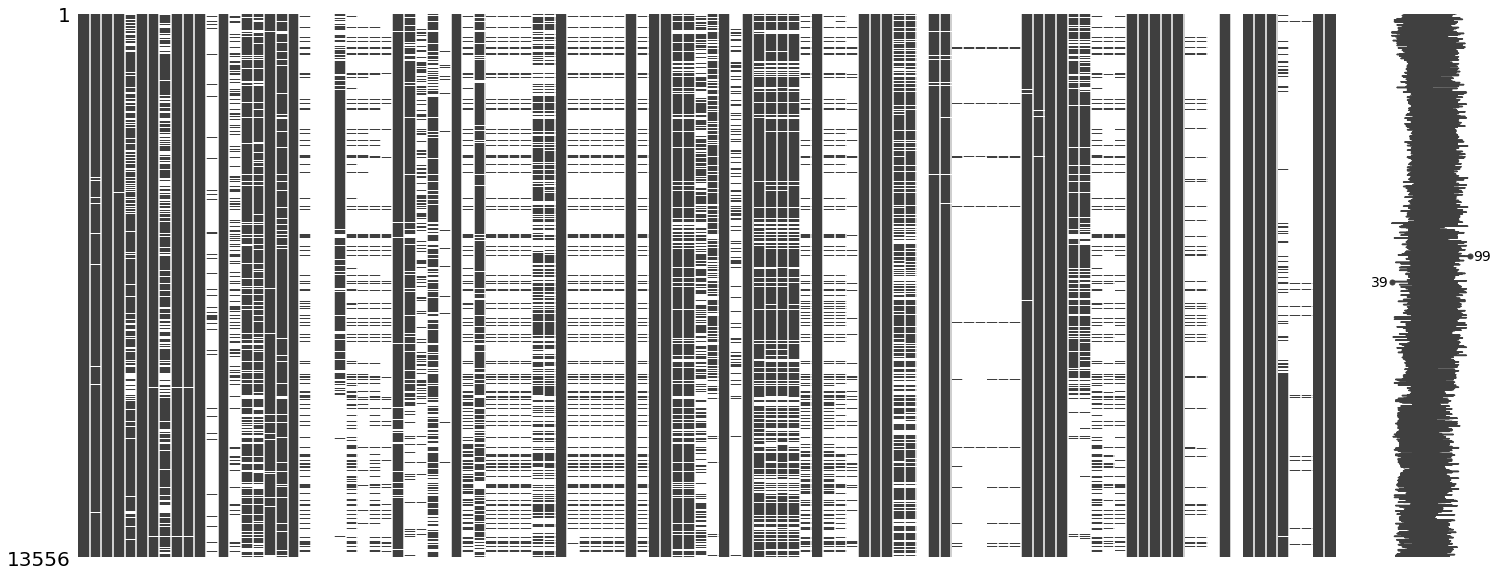

In [8]:
# Visualize null values as matrix
msno.matrix(data);

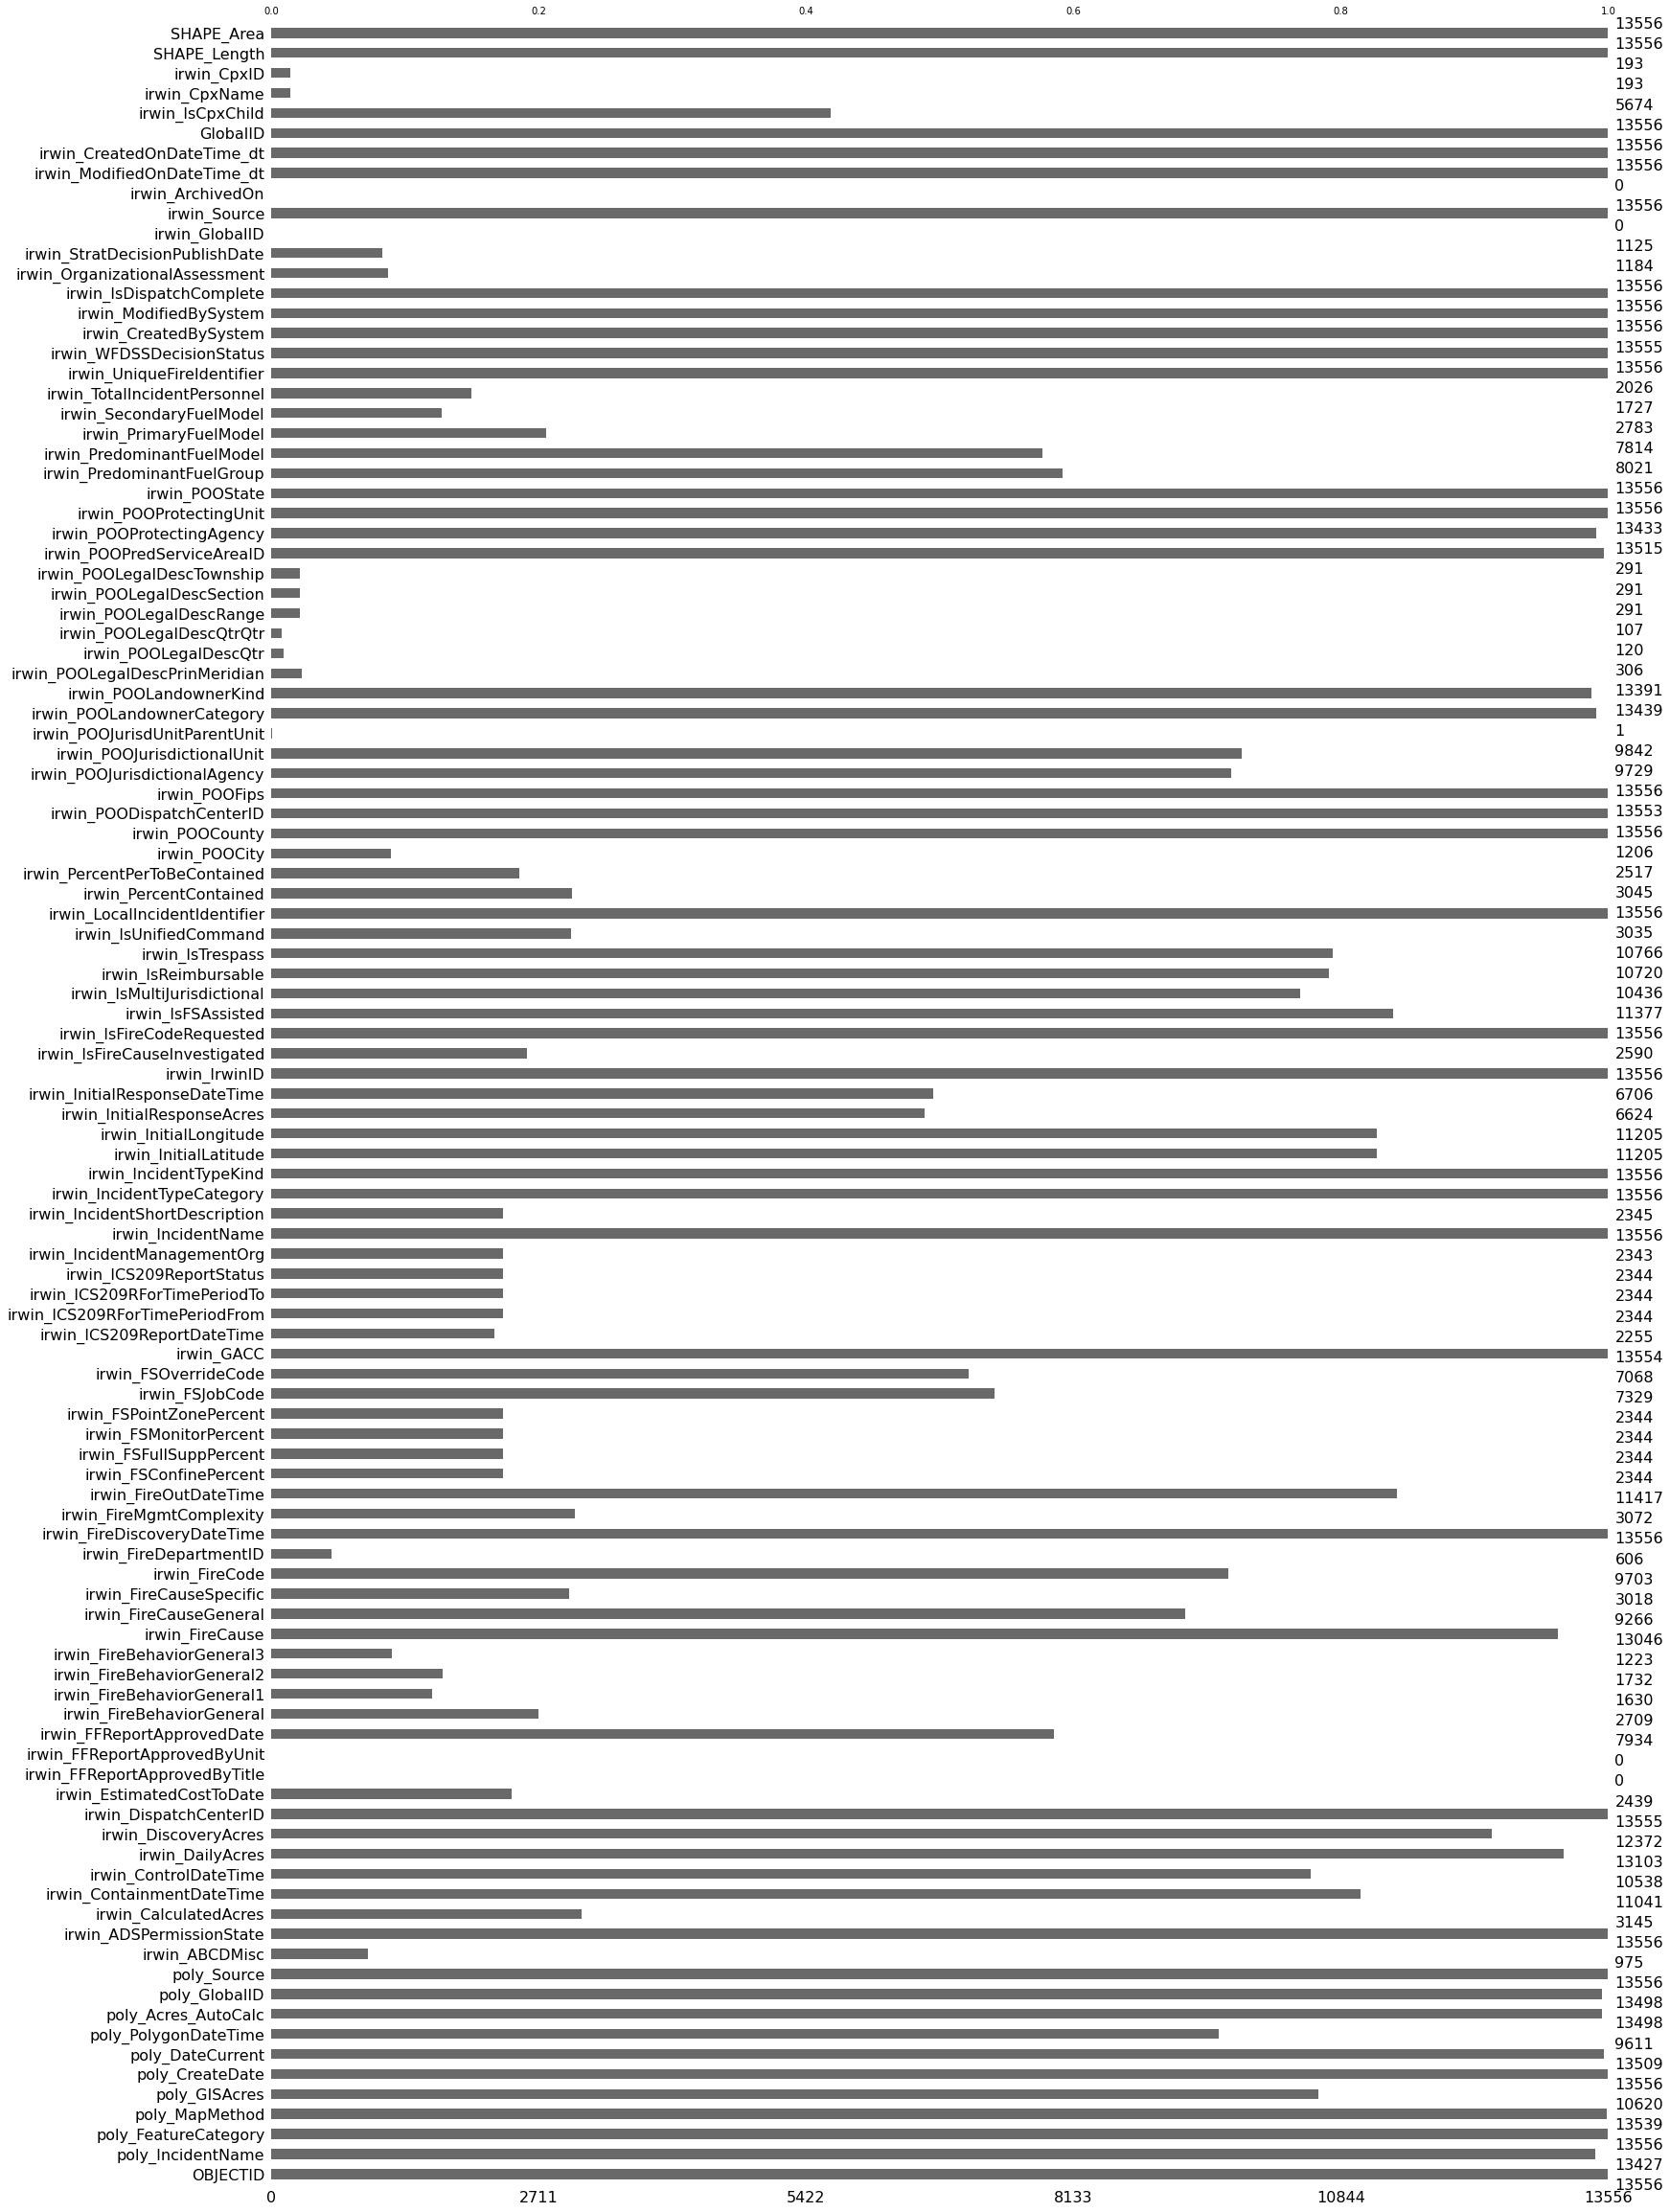

In [9]:
# Visualize null values as bar plot
msno.bar(data);

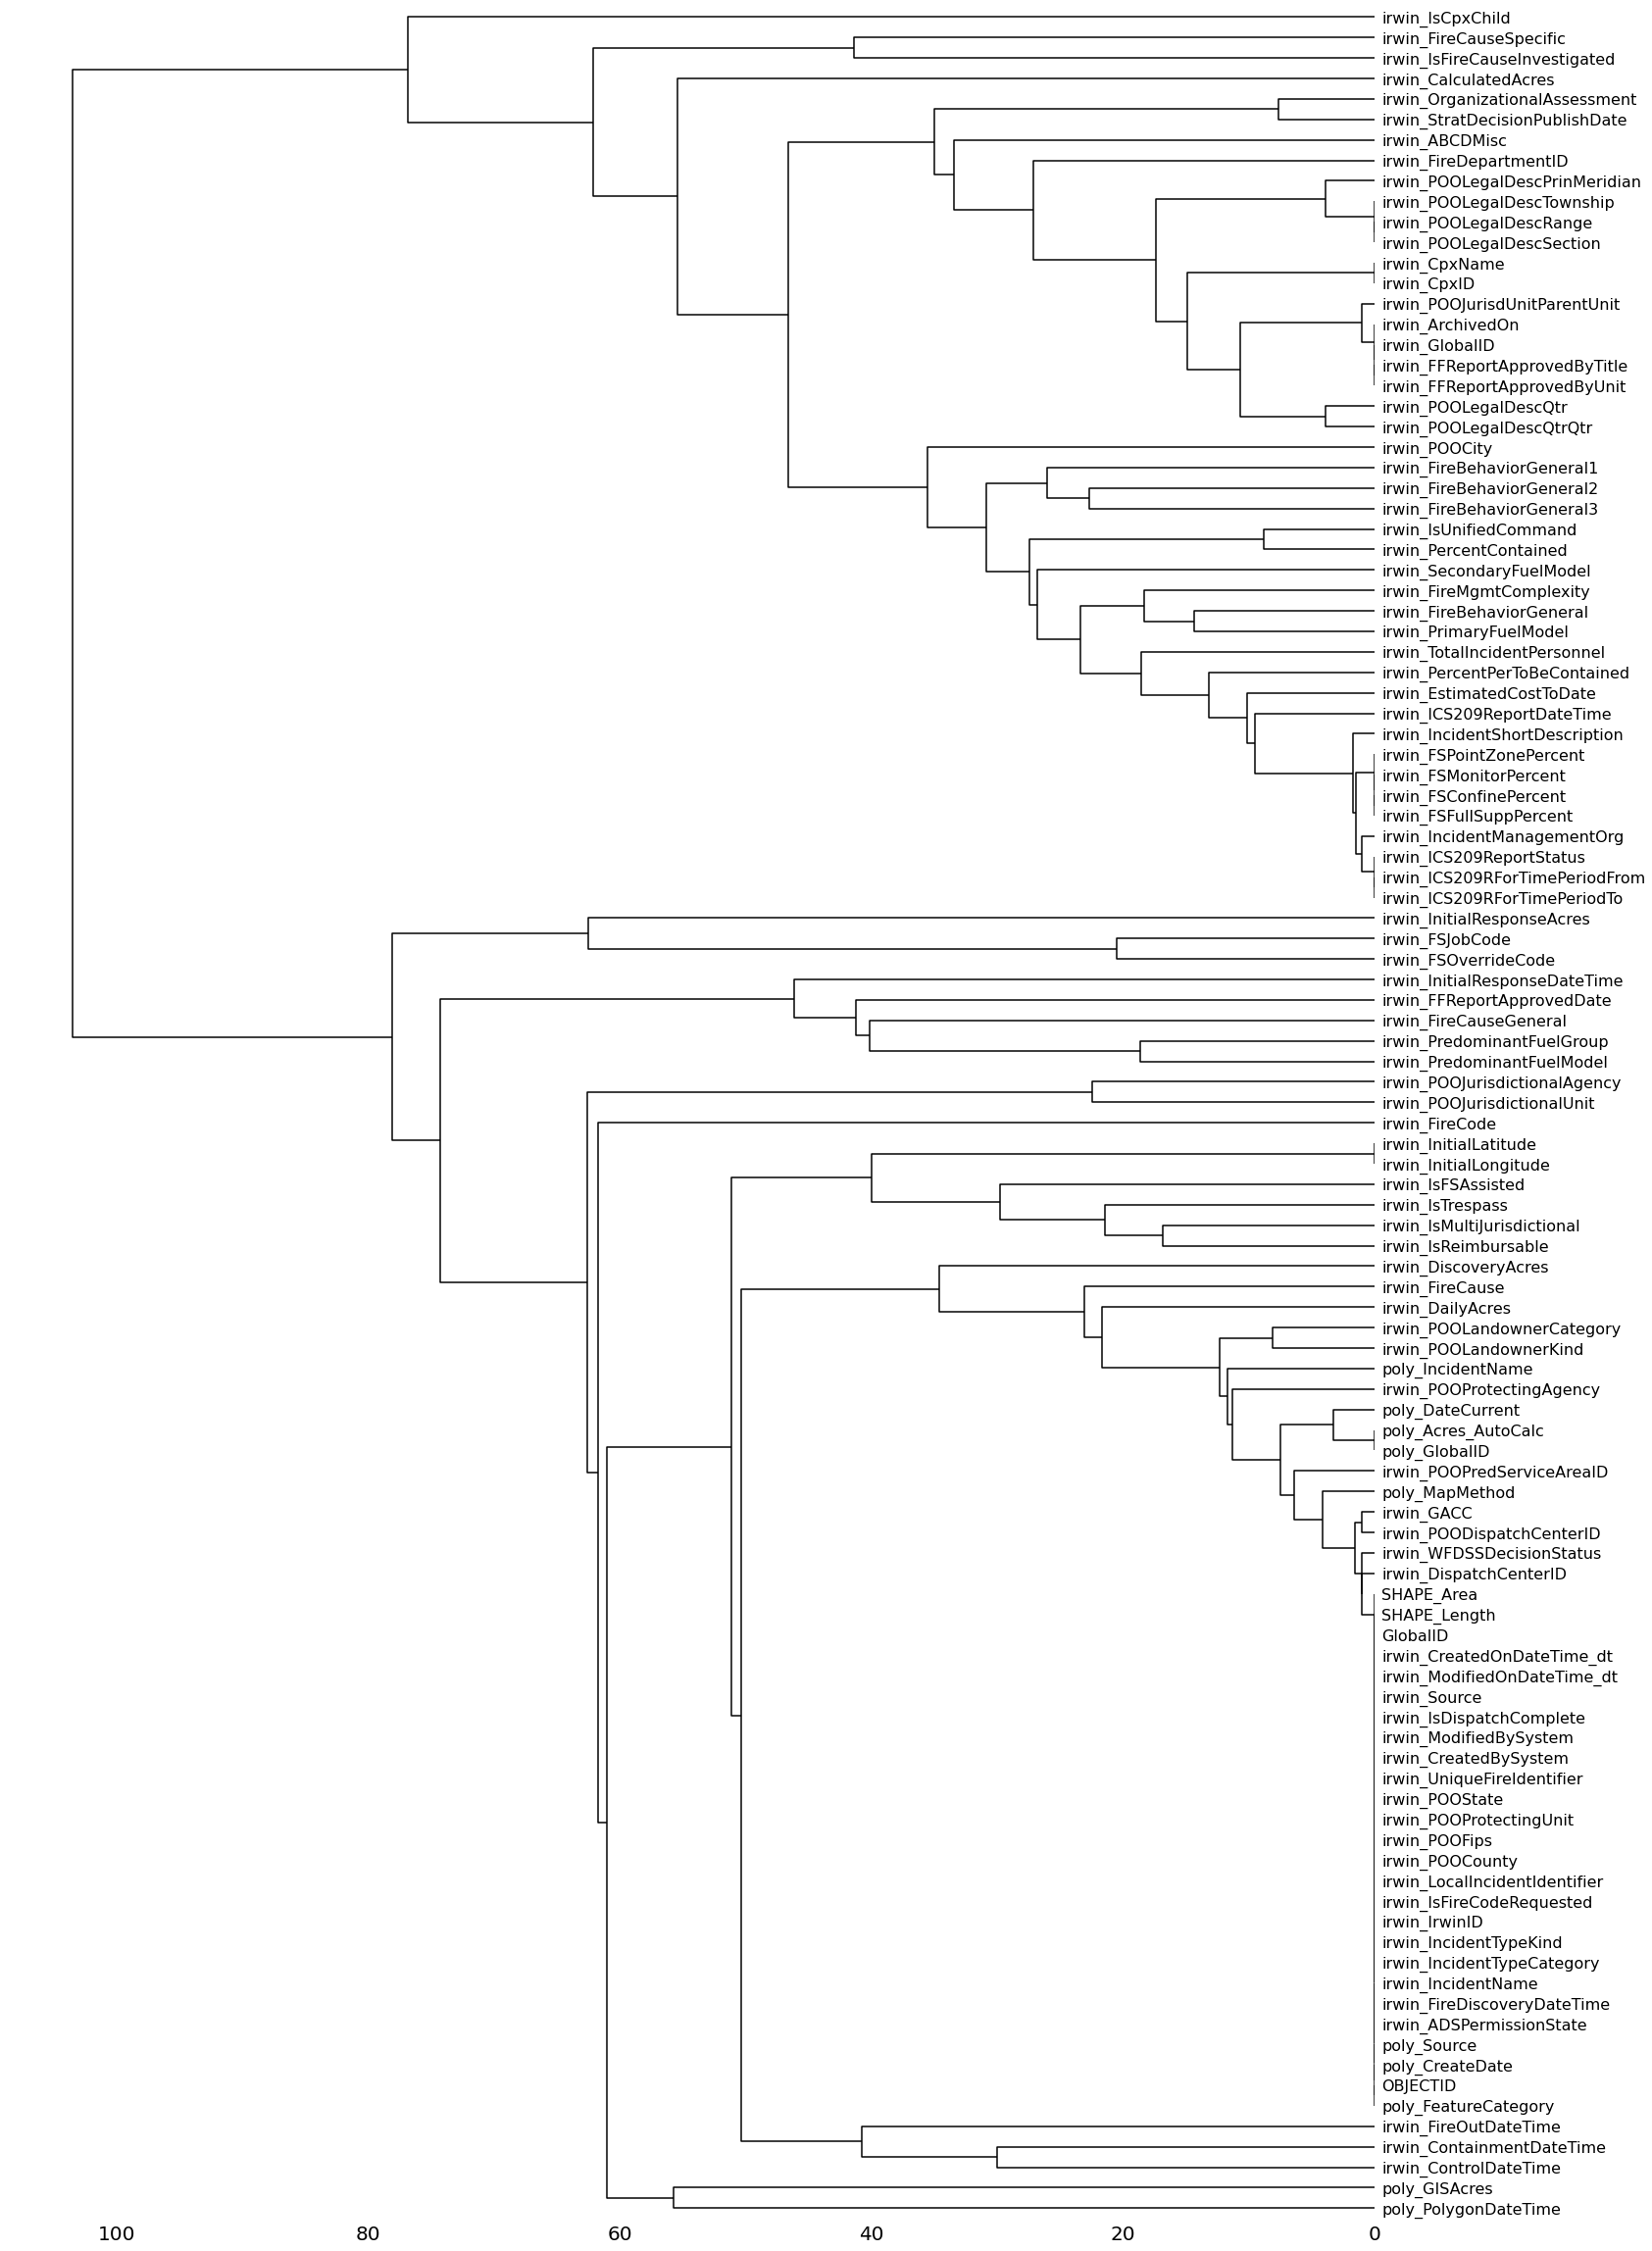

In [10]:
msno.dendrogram(data);

In [11]:
# Drop columns where 75% or more of values are missing
data = data.dropna(thresh = 0.75*len(data), axis = 1)

# Drop columns that are not relevant for the current analysis
data = data.drop(data.columns[np.r_[2:4, 5:7, 8:11, 15, 19, 21:23, 25:32, 33:35, 37:40, 41:50]], axis=1)

In [12]:
# Dataset contains two features reflecting incident name
# irwin_IncidentName contains fewer null values
# Compare values to determine whether poly_IncidentName can be safely dropped
pd.set_option('display.width', 200)
print(data[['poly_IncidentName', 'irwin_IncidentName']].loc[data['poly_IncidentName'] != data['irwin_IncidentName']])
#data = data.drop(data['poly_IncidentName'], axis = 1)

                                       poly_IncidentName                            irwin_IncidentName
10                              race point south blowout                 race point south blowout fire
12                                               elkhorn                                   shf elkhorn
50                                          penrose fire                                       penrose
72                                          bozarth fire                                       bozarth
75                                     inchelium highway                              inchelium  hiway
81                                               59 road                                    highway 59
94                                              ute fire                                           ute
97                butte, tehama, glenn lightning complex                                          1-12
99                                          logging fire                 

In [13]:
# Dataset contains two features reflecting acreage
# poly_Acres_AutoCalc contains fewer null values
# Compare values to determine whether poly_GISAcres can be safely dropped
print(data[['poly_GISAcres', 'poly_Acres_AutoCalc']].loc[data['poly_GISAcres'] != data['poly_Acres_AutoCalc']])
#data = data.drop(data['poly_GISAcres'], axis = 1)

              poly_GISAcres   poly_Acres_AutoCalc
0          562.913504426158      562.911767294885
1         0.151680183041868     0.151679658701826
2                       0.3      2.85069129790169
3          44.3005169806328      44.3003519242799
4                       NaN      6.21136682856688
5                      0.93     0.934468211073125
6                       0.1      100.415640980296
7                         1      21.2599339015124
8                         1      1.39069382848944
9                       0.8      6.79716766753429
10                      NaN     0.324307185181966
11         3496.26612994637      3498.79892587818
12            51576.7440128      51617.2199263135
13                     4.86      4.85999377956288
14         10133.9550011507      10141.7644498413
15                      NaN      1.14169505782212
16         26751.7555383592      26751.6780553972
17                      NaN      5.36239336325832
18                      0.1      91.8194114427307


In [14]:
# Display updated dataset columns, non-null counts, & data types
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13556 entries, 0 to 13555
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   OBJECTID                     13556 non-null  object
 1   poly_IncidentName            13427 non-null  object
 2   poly_GISAcres                10620 non-null  object
 3   poly_Acres_AutoCalc          13498 non-null  object
 4   irwin_ContainmentDateTime    11041 non-null  object
 5   irwin_ControlDateTime        10538 non-null  object
 6   irwin_DailyAcres             13103 non-null  object
 7   irwin_DiscoveryAcres         12372 non-null  object
 8   irwin_FireCause              13046 non-null  object
 9   irwin_FireDiscoveryDateTime  13556 non-null  object
 10  irwin_FireOutDateTime        11417 non-null  object
 11  irwin_IncidentName           13556 non-null  object
 12  irwin_InitialLatitude        11205 non-null  object
 13  irwin_InitialLongitude       11

In [15]:
# Modify data types

# Convert appropriate columns to string
data[['OBJECTID', 'poly_IncidentName', 'irwin_FireCause', 'irwin_IncidentName', 'irwin_POOCounty', 
    'irwin_POOLandownerCategory', 'irwin_POOLandownerKind', 'irwin_POOState']] = data[['OBJECTID', 
    'poly_IncidentName', 'irwin_FireCause', 'irwin_IncidentName', 'irwin_POOCounty', 
    'irwin_POOLandownerCategory', 'irwin_POOLandownerKind', 'irwin_POOState']].astype('string')

# Convert appropriate columns to float
data[['poly_GISAcres', 'poly_Acres_AutoCalc', 'irwin_DailyAcres', 'irwin_DiscoveryAcres', 'irwin_InitialLatitude',
    'irwin_InitialLongitude', 'SHAPE_Length', 'SHAPE_Area']] = data[['poly_GISAcres', 'poly_Acres_AutoCalc', 
    'irwin_DailyAcres', 'irwin_DiscoveryAcres', 'irwin_InitialLatitude', 'irwin_InitialLongitude', 
    'SHAPE_Length', 'SHAPE_Area']].astype('float64')

# Convert appropriate columns to datetime
data[['irwin_ContainmentDateTime', 'irwin_ControlDateTime', 'irwin_FireDiscoveryDateTime', 
    'irwin_FireOutDateTime']] = data[['irwin_ContainmentDateTime', 'irwin_ControlDateTime', 
    'irwin_FireDiscoveryDateTime', 'irwin_FireOutDateTime']].apply(pd.to_datetime, 
    format = '%Y-%m-%dT%H:%M:%S.%f%z')

In [16]:
# Display modifed data types
data.dtypes

OBJECTID                                    string
poly_IncidentName                           string
poly_GISAcres                              float64
poly_Acres_AutoCalc                        float64
irwin_ContainmentDateTime      datetime64[ns, UTC]
irwin_ControlDateTime          datetime64[ns, UTC]
irwin_DailyAcres                           float64
irwin_DiscoveryAcres                       float64
irwin_FireCause                             string
irwin_FireDiscoveryDateTime    datetime64[ns, UTC]
irwin_FireOutDateTime          datetime64[ns, UTC]
irwin_IncidentName                          string
irwin_InitialLatitude                      float64
irwin_InitialLongitude                     float64
irwin_POOCounty                             string
irwin_POOLandownerCategory                  string
irwin_POOLandownerKind                      string
irwin_POOState                              string
SHAPE_Length                               float64
SHAPE_Area                     

In [17]:
# Extract state from irwin_POOState and create new column
data['State'] = data['irwin_POOState'].str.split('-').str[1]

In [18]:
# Calculate duration of fire in days and create new column 
data['fire_Duration'] = data['irwin_ControlDateTime'] - data['irwin_FireDiscoveryDateTime']
data['fire_Duration'] = data['fire_Duration'].dt.total_seconds()/60/60/24

In [19]:
# Impute missing fire_Duration values using multivariate imputation by chained equation (MICE)
lr = LinearRegression()

def mice(df_col):
    mice_imputer = IterativeImputer(estimator = lr, missing_values = np.nan, max_iter = 10, verbose = 2, 
                                    imputation_order = 'ascending',random_state = 42)
    mice_imputed = mice_imputer.fit_transform((df_col).array.reshape(-1, 1))
    return mice_imputed

data['fire_Duration'] = mice(data['fire_Duration'])

In [20]:
# Descriptive statistics for fire duration 
data['fire_Duration'].describe()

count    13556.000000
mean         8.952713
std         20.040359
min          0.000000
25%          0.667708
50%          3.725069
75%          8.952713
max        363.987488
Name: fire_Duration, dtype: float64

In [21]:
# Median for fire duration
median = data['fire_Duration'].median()
print('median', round(median, 6))

median 3.725069


In [ ]:
# Use auto calc acreage
# Aggregate fires by state and compare time, acreage, etc.???
# Correlation between features (state vs. acreage or time, lat/long vs. acreage or time???
# It looks like there are multiple incidents that share the same name but the rows aren't duplicates- 
#could mean either the same name was used for two distinct fires or two fires occurred in the same area?